# Compare Other Methods

Here we compare non-exponent estimations to each other.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from neurodsp.sim import sim_combined
from neurodsp.utils import set_random_seed

from antropy import higuchi_fd
from antropy import perm_entropy, app_entropy

from bootstrap import bootstrap_corr

In [2]:
# Import custom code
import sys; from pathlib import Path
sys.path.append(str(Path('..').resolve()))

from apm.run import run_comparisons
from apm.plts import plot_dots
from apm.utils import format_corr, sampler

from apm.methods import app_entropy, perm_entropy
from apm.methods import hurst_wrapper, dfa_wrapper
from apm.methods import hjorth_complexity_wrapper, lempelziv_wrapper
from apm.methods.settings import HURST_PARAMS, DFA_PARAMS, AP_ENT_PARAMS, PE_ENT_PARAMS

from apm.sim.settings import FS, SIM_PARAMS_COMB

## Settings

In [3]:
# Set the random seed
set_random_seed(111)

In [4]:
# Notebook settings
SAVE_FIG = False

## Collect Methods

In [5]:
# Define ranges to sample parameters from
samplers = {'update_comb_exp' : sampler(np.arange(-2.5, 0, 0.1)),
            'update_pow' : sampler(np.arange(0, 1, 0.1)),
            'update_freq' : sampler(np.arange(5, 35, 1))}

In [6]:
# Define measures to apply
measures = {hurst_wrapper : HURST_PARAMS, 
            dfa_wrapper : DFA_PARAMS,
            hjorth_complexity_wrapper : {}, 
            lempelziv_wrapper : {},
            higuchi_fd : {},
            app_entropy : AP_ENT_PARAMS,
            perm_entropy : PE_ENT_PARAMS}

## Run Simulations

In [7]:
N_SIMS = 100

In [8]:
# Run simulations, comparing specparam exponent to entropy
outputs = run_comparisons(sim_combined, SIM_PARAMS_COMB, measures, samplers, n_sims=N_SIMS)
hst, dfa, hjo, lzc, hfd, aen, pen = outputs

### Fluctuations to Complexity

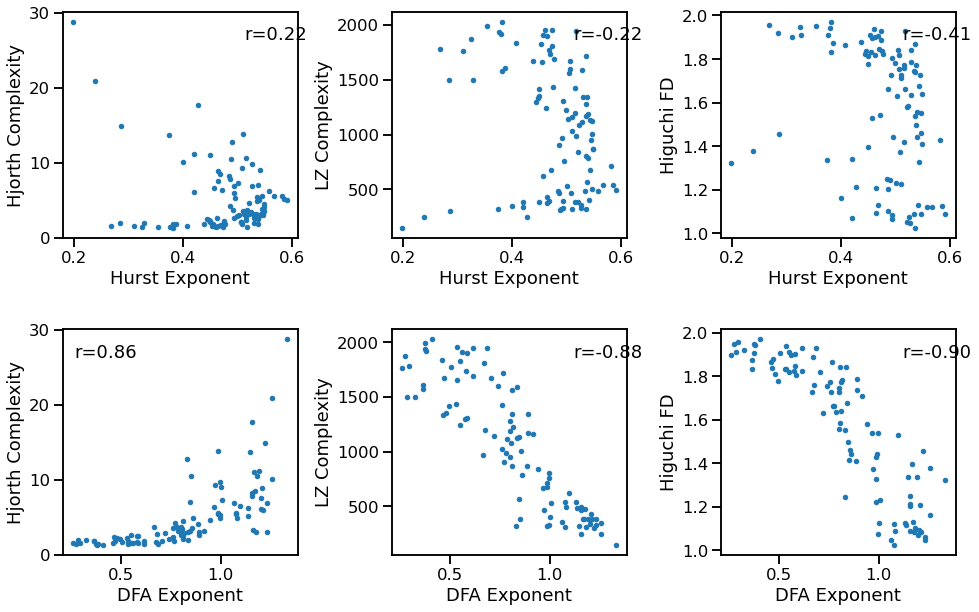

In [10]:
# Plot comparisons
_, axes = plt.subplots(2, 3, figsize=[16, 10])
plot_dots(hst, hjo, ax=axes[0, 0], tposition='tr',
         xlabel='Hurst Exponent', ylabel='Hjorth Complexity')
plot_dots(hst, lzc, ax=axes[0, 1], tposition='tr',
         xlabel='Hurst Exponent', ylabel='LZ Complexity')
plot_dots(hst, hfd, ax=axes[0, 2], tposition='tr',
         xlabel='Hurst Exponent', ylabel='Higuchi FD')
plot_dots(dfa, hjo, ax=axes[1, 0], tposition='tl',
         xlabel='DFA Exponent', ylabel='Hjorth Complexity')
plot_dots(dfa, lzc, ax=axes[1, 1], tposition='tr',
         xlabel='DFA Exponent', ylabel='LZ Complexity')
plot_dots(dfa, hfd, ax=axes[1, 2], tposition='tr',
         xlabel='DFA Exponent', ylabel='Higuchi FD')
plt.subplots_adjust(wspace=0.4, hspace=0.4)

In [11]:
# Compute bootstrapped correlations
corrs_hst_hjo = bootstrap_corr(hst, hjo)
corrs_hst_lzc = bootstrap_corr(hst, lzc)
corrs_hst_hfd = bootstrap_corr(hst, hfd)
corrs_dfa_hjo = bootstrap_corr(dfa, hjo)
corrs_dfa_lzc = bootstrap_corr(dfa, lzc)
corrs_dfa_hfd = bootstrap_corr(dfa, hfd)

In [12]:
print('Correlations:')
print('  HST & HJO:  ', format_corr(*corrs_hst_hjo))
print('  HST & LZC:  ', format_corr(*corrs_hst_lzc))
print('  HST & HFD:  ', format_corr(*corrs_hst_hfd))
print('  DFA & HJO:  ', format_corr(*corrs_dfa_hjo))
print('  DFA & LZC:  ', format_corr(*corrs_dfa_lzc))
print('  DFA & HFD:  ', format_corr(*corrs_dfa_hfd))

Correlations:
  HST & HJO:   r=+0.222  CI[-0.006, +0.432],  p=0.027
  HST & LZC:   r=-0.223  CI[-0.433, -0.000],  p=0.026
  HST & HFD:   r=-0.414  CI[-0.585, -0.231],  p=0.000
  DFA & HJO:   r=+0.857  CI[+0.793, +0.897],  p=0.000
  DFA & LZC:   r=-0.885  CI[-0.914, -0.837],  p=0.000
  DFA & HFD:   r=-0.900  CI[-0.923, -0.860],  p=0.000


### Complexity to Entropy

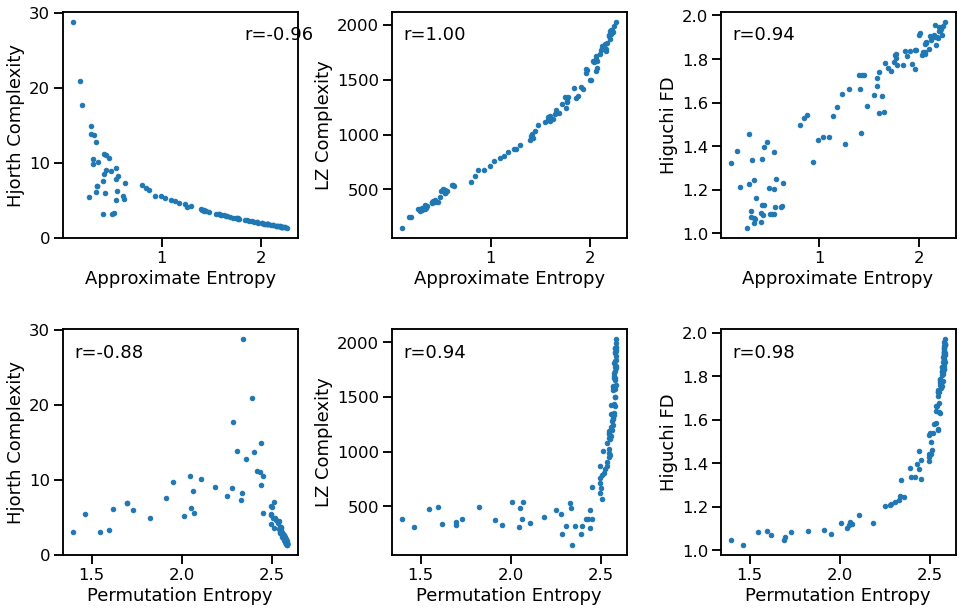

In [13]:
# Plot comparisons
_, axes = plt.subplots(2, 3, figsize=[16, 10])
plot_dots(aen, hjo, ax=axes[0, 0], tposition='tr',
         xlabel='Approximate Entropy', ylabel='Hjorth Complexity')
plot_dots(aen, lzc, ax=axes[0, 1], tposition='tl',
         xlabel='Approximate Entropy', ylabel='LZ Complexity')
plot_dots(aen, hfd, ax=axes[0, 2], tposition='tl',
         xlabel='Approximate Entropy', ylabel='Higuchi FD')
plot_dots(pen, hjo, ax=axes[1, 0], tposition='tl',
         xlabel='Permutation Entropy', ylabel='Hjorth Complexity')
plot_dots(pen, lzc, ax=axes[1, 1], tposition='tl',
         xlabel='Permutation Entropy', ylabel='LZ Complexity')
plot_dots(pen, hfd, ax=axes[1, 2], tposition='tl',
         xlabel='Permutation Entropy', ylabel='Higuchi FD')
plt.subplots_adjust(wspace=0.4, hspace=0.4)

In [14]:
# Compute bootstrapped correlations
corrs_aen_hjo = bootstrap_corr(aen, hjo)
corrs_aen_lzc = bootstrap_corr(aen, lzc)
corrs_aen_hfd = bootstrap_corr(aen, hfd)
corrs_pen_hjo = bootstrap_corr(pen, hjo)
corrs_pen_lzc = bootstrap_corr(pen, lzc)
corrs_pen_hfd = bootstrap_corr(pen, hfd)

In [15]:
print('Correlations:')
print('  AEN & HJO:  ', format_corr(*corrs_aen_hjo))
print('  AEN & LZC:  ', format_corr(*corrs_aen_lzc))
print('  AEN & HFD:  ', format_corr(*corrs_aen_hfd))
print('  PEN & HJO:  ', format_corr(*corrs_pen_hjo))
print('  PEN & LZC:  ', format_corr(*corrs_pen_lzc))
print('  PEN & HFD:  ', format_corr(*corrs_pen_hfd))

Correlations:
  AEN & HJO:   r=-0.963  CI[-0.987, -0.921],  p=0.000
  AEN & LZC:   r=+0.997  CI[+0.994, +0.998],  p=0.000
  AEN & HFD:   r=+0.944  CI[+0.901, +0.964],  p=0.000
  PEN & HJO:   r=-0.884  CI[-0.941, -0.791],  p=0.000
  PEN & LZC:   r=+0.941  CI[+0.894, +0.963],  p=0.000
  PEN & HFD:   r=+0.983  CI[+0.967, +0.989],  p=0.000


### Entropy to Fluctuations

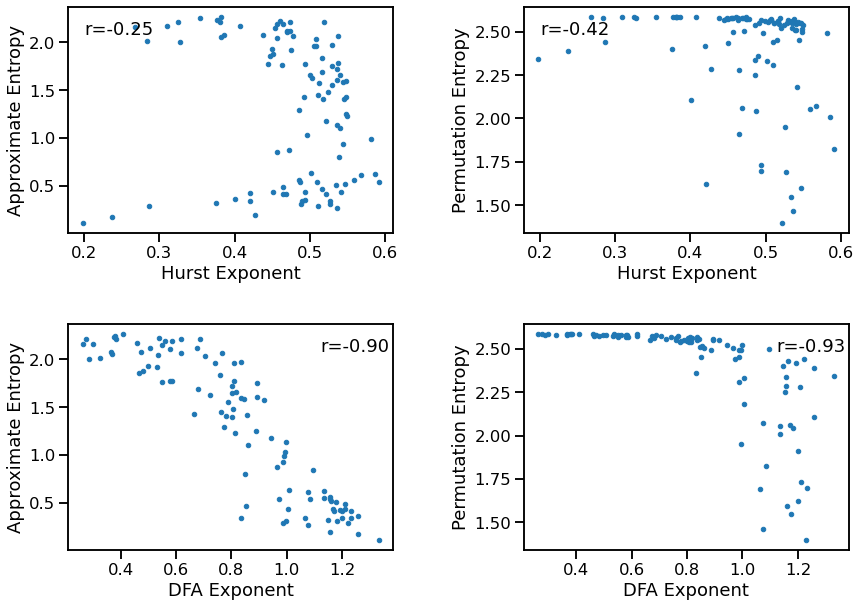

In [16]:
# Plot comparisons
_, axes = plt.subplots(2, 2, figsize=[14, 10])
plot_dots(hst, aen, ax=axes[0, 0], tposition='tl',
         xlabel='Hurst Exponent', ylabel='Approximate Entropy')
plot_dots(hst, pen, ax=axes[0, 1], tposition='tl',
         xlabel='Hurst Exponent', ylabel='Permutation Entropy')
plot_dots(dfa, aen, ax=axes[1, 0], tposition='tr',
         xlabel='DFA Exponent', ylabel='Approximate Entropy')
plot_dots(dfa, pen, ax=axes[1, 1], tposition='tr',
         xlabel='DFA Exponent', ylabel='Permutation Entropy')
plt.subplots_adjust(wspace=0.4, hspace=0.4)

In [17]:
# Compute bootstrapped correlations
corrs_hst_aen = bootstrap_corr(hst, aen)
corrs_hst_pen = bootstrap_corr(hst, pen)
corrs_dfa_aen = bootstrap_corr(dfa, aen)
corrs_dfa_pen = bootstrap_corr(dfa, pen)

In [18]:
print('Correlations:')
print('  HST & AEN:  ', format_corr(*corrs_hst_aen))
print('  HST & PEN:  ', format_corr(*corrs_hst_pen))
print('  DFA & AEN:  ', format_corr(*corrs_dfa_aen))
print('  DFA & PEN:  ', format_corr(*corrs_dfa_pen))

Correlations:
  HST & AEN:   r=-0.255  CI[-0.459, -0.025],  p=0.011
  HST & PEN:   r=-0.418  CI[-0.592, -0.221],  p=0.000
  DFA & AEN:   r=-0.899  CI[-0.925, -0.858],  p=0.000
  DFA & PEN:   r=-0.928  CI[-0.944, -0.892],  p=0.000


## Conclusions

Words, words, words.